In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from math import exp

# Problem 1
## 1.1

In [2]:
housing_data = scipy.io.loadmat("data/housing_data.mat")

In [3]:
raw_x_train = pd.DataFrame(housing_data['Xtrain'])
raw_y_train = pd.DataFrame(housing_data['Ytrain'])
raw_x_validate = pd.DataFrame(housing_data['Xvalidate'])
raw_y_validate = pd.DataFrame(housing_data['Yvalidate'])
print(raw_x_train.shape, raw_y_train.shape)
print( raw_x_validate.shape,raw_y_validate.shape)

(19440, 8) (19440, 1)
(1200, 8) (1200, 1)


In [4]:
raw_x_train[9] = 1
raw_x_validate[9] = 1
print(raw_x_train.shape, raw_y_train.shape)
print(raw_x_validate.shape, raw_y_validate.shape)

(19440, 9) (19440, 1)
(1200, 9) (1200, 1)


In [5]:
raw_x_train.head()

,0,1,2,3,4,5,6,7,9
0,2.9241,32,1083,188,471,178,38.04,-121.11,1
1,4.8993,34,3306,555,1398,585,37.99,-122.55,1
2,5.0528,26,2256,360,937,372,38.13,-121.30,1
3,6.0634,15,1834,330,841,309,33.68,-117.78,1
4,1.7500,27,471,132,315,96,33.81,-118.18,1


In [6]:
X = raw_x_train.values
y = raw_y_train.values
x_val = raw_x_validate.values
y_val = raw_y_validate.values
w = np.zeros((1,8))

In [7]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(w.reshape((9,)))
y_hat = np.dot(x_val,w)

[  4.05879986e+04   1.19561189e+03  -8.50145688e+00   1.18352188e+02
  -3.77900280e+01   4.30562637e+01  -4.21794075e+04  -4.24573474e+04
  -3.56686439e+06]


## 1.2

In [8]:
rss = np.sum((y_val - y_hat) ** 2)
tss = np.sum((y_val - np.mean(y_val)) ** 2)
r_sqrd = 1 - (rss/tss)
print("RSS: %i" % rss)
print("R^2: %.3f" % r_sqrd)
print("Range of y Hat Values => Min: %i Max: %i" %(min(y_hat), max(y_hat)))
print("Range of True Y Values => Min: %i Max: %i" %(min(y_val), max(y_val)))

RSS: 5794953797676
R^2: 0.643
Range of y Hat Values => Min: -56562 Max: 710798
Range of True Y Values => Min: 28300 Max: 500001


These values do not make sense! How can we have negative household value? Since our model is not robust to outliers, they're likely pulling our entire graph up and messing up the values at the bottom.

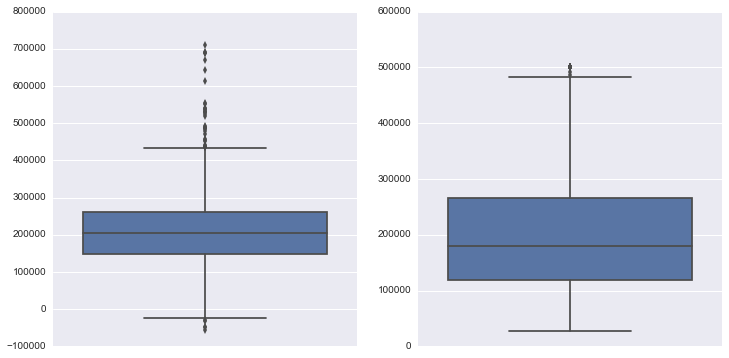

In [9]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.boxplot(y_hat, orient='v', ax=axes[0])
sns.boxplot(y_val, orient='v', ax=axes[1])

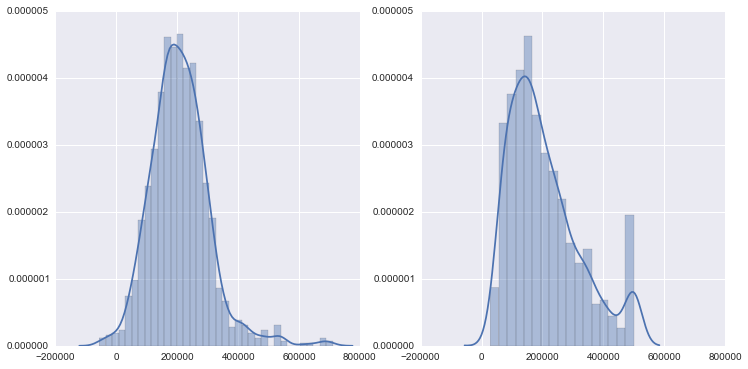

In [10]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.distplot(y_hat, ax=axes[0])
sns.distplot(y_val, ax=axes[1])

## 1.3

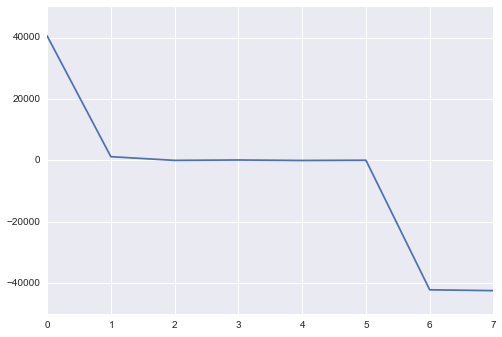

In [11]:
pd.Series(w.reshape((9,))[:8]).plot() # without bias value

## 1.4

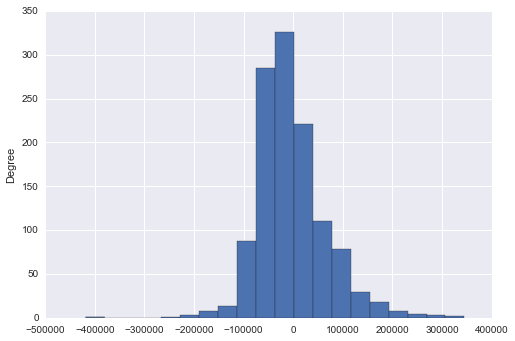

In [12]:
pd.Series((y_val - y_hat).reshape((1200,))).plot(kind='hist', bins=20)

This resembles the normal distribution! This is what we want out of our residuals - that our errors are drawn from a normal distribution and there isn't really any discernable patterns beyond the fact that no error is most common and large errors are rare. We can see however that it's a bit skewed.

# Problem 2

## 2.1 and 2.2

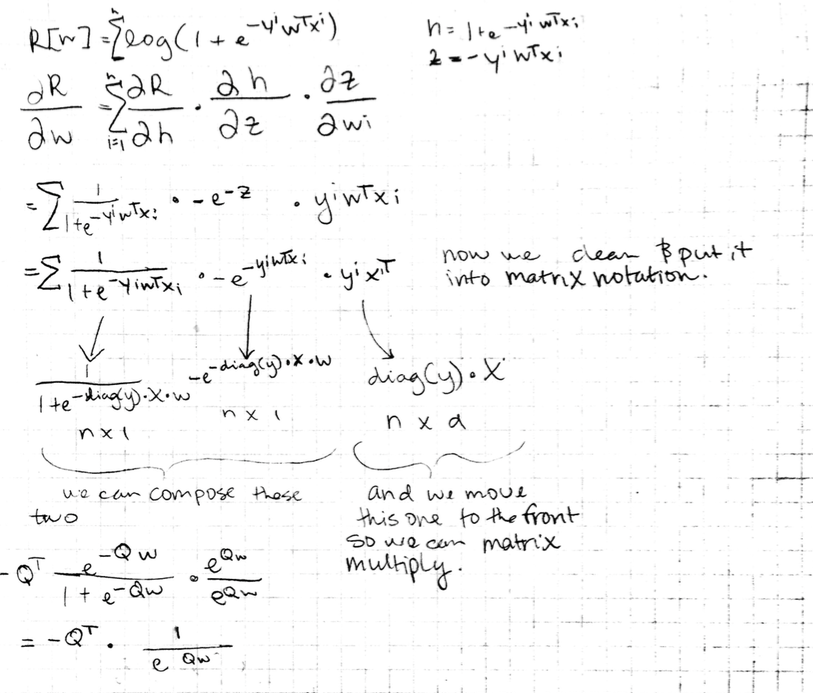

In [279]:
from IPython.display import Image
Image(filename='2.1.png')

## 2.2

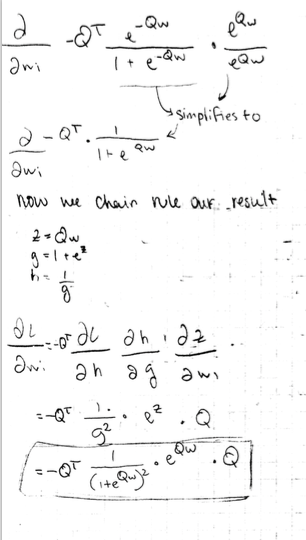

In [281]:
Image(filename='2.2.png')

## 2.3

In [282]:
X = np.array([
        [0,3,1],
        [1,3,1],
        [0,1,1],
        [1,1,1]
    ])
y = np.array([1,1,-1,-1])

In [283]:
def log_func(x):
    return 1 / (1 + np.exp(-x))

def descend(X, y, w, alpha):
    Q = np.dot(np.diag(y), X)
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    return w - alpha * combo

In [284]:
w_0 = np.array([-2,1,0])
w_0_pred = log_func(np.dot(X, w_0))
print(w_0)
print(w_0_pred)
print("---- end w_0 ----")
w_1 = descend(X, y, w_0, 1)
w_1_pred = log_func(np.dot(X, w_1))
print(w_1)
print(w_1_pred)
print("---- end w_1 ----")
w_2 = descend(X, y, w_1, 1)
w_2_pred = log_func(np.dot(X, w_2))
print(w_2)
print(w_2_pred)
print("---- end w_2 ----")

[-2  1  0]
[ 0.95257413  0.73105858  0.73105858  0.26894142]
---- end w_0 ----
[-2.          0.94910188 -0.68363271]
[ 0.89693957  0.54082713  0.56598026  0.15000896]
---- end w_1 ----
[-1.69083609  1.91981257 -0.83738862]
[ 0.99276849  0.96199213  0.74695242  0.35242149]
---- end w_2 ----


# Problem 3

### Transformations

In [285]:
def standardize_cols(X):
    zscore = lambda x: (x.mean() - x)/x.std()
    return pd.DataFrame(X).apply(zscore).values

def binarize_cols(X):
    temp = X.copy()
    temp[temp > 0] = 1
    temp[temp <= 0] = 0
    return temp

In [286]:
spam_data = scipy.io.loadmat("data/spam.mat")
Xraw = pd.DataFrame(spam_data['Xtrain'])
y = spam_data['Ytrain'].reshape((3450,))
Xtestraw = pd.DataFrame(spam_data['Xtest'])
print(Xraw.shape, y.shape, Xtestraw.shape)

stan_X = pd.DataFrame(standardize_cols(Xraw.values))
log_X = pd.DataFrame(np.log(Xraw.values + 0.1))
bin_X = pd.DataFrame(binarize_cols(Xraw.values))
stan_X[57] = 1
log_X[57] = 1
bin_X[57] = 1
Xraw[57] = 1
X = Xraw.values
stan_X = stan_X.values
log_X = log_X.values
bin_X = bin_X.values
print(X.shape, stan_X.shape, log_X.shape, bin_X.shape)

(3450, 57) (3450,) (1151, 57)
(3450, 58) (3450, 58) (3450, 58) (3450, 58)


## 3.1

In [287]:
def batch_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    risk = np.sum(np.log(1 + np.exp(-z)))
    return w - alpha * combo / len(X), risk

def batch_wrapper(X, y, alpha, num_iters):
    w = np.zeros(len(X[0, :]))
    Q = np.dot(np.diag(y), X)
    risks = []
    for count in range(num_iters):
        new_w, risk = batch_gradient_descent(Q, w, alpha)
        risks.append(risk)
        w = new_w
    return w, pd.DataFrame(risks)

In [288]:
alpha = 0.005
num_iters = 5000

In [289]:
w2, risks2 = batch_wrapper(stan_X, y, alpha, num_iters)
w3, risks3 = batch_wrapper(log_X, y, alpha, num_iters)
w4, risks4 = batch_wrapper(bin_X, y, alpha, num_iters)

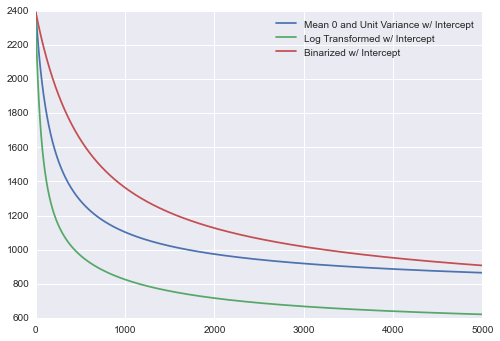

In [291]:
all_risks = pd.concat([risks2, risks3, risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()
# # if you want each plot just call this
# risks2.plot()
# risks3.plot()
# risks4.plot() 

## 3.2

This is the same update as before except we only use one point to derive the gradient, not the entire dataset as we were doing before. You can see this in the code below where now *Q* is lowercase, signifying that we're doing it based on one row.

In [345]:
from random import shuffle

def shuffle_data(X, y):
    shuff = list(range(len(X)))
    shuffle(shuff)
    X = X[shuff]
    y = y[shuff]
    Q = np.dot(np.diag(y), X)
    return Q, X, y

def stochastic_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + top
    combo = (np.dot(-Q.T, (top/bottom)))
    return w - alpha * combo

def stochastic_wrapper(X, y, num_iters, alpha):
    w = np.zeros(len(X[0,:]))
    risks = []
    Q, X, y = shuffle_data(X, y)
    nullr = False
    if not alpha:
        nullr = True
    for count in range(num_iters):
        if nullr:
            alpha = 1 / (count + 1)
        choice = np.random.randint(0,len(X))
        new_w = stochastic_gradient_descent(Q[choice], w, alpha)
        w = new_w
        risks.append(np.sum(np.log(1 + np.exp(-Q.dot(w)))))
    return w, pd.DataFrame(risks)

In [348]:
learning_rate = 0.001
num_iters = 10000

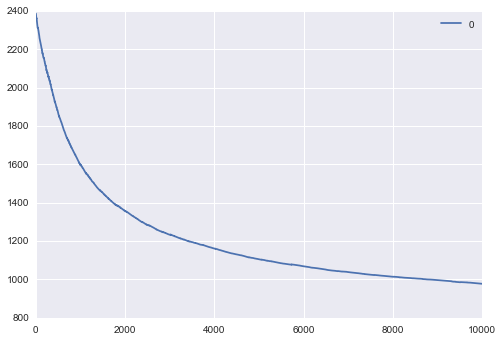

In [349]:
w2, risks2 = stochastic_wrapper(stan_X, y, num_iters, learning_rate)
risks2.plot()

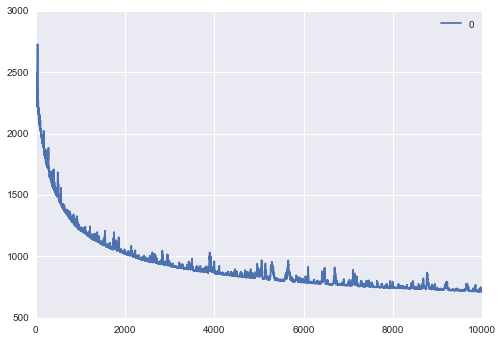

In [350]:
w3, risks3 = stochastic_wrapper(log_X, y, num_iters, learning_rate)
risks3.plot()

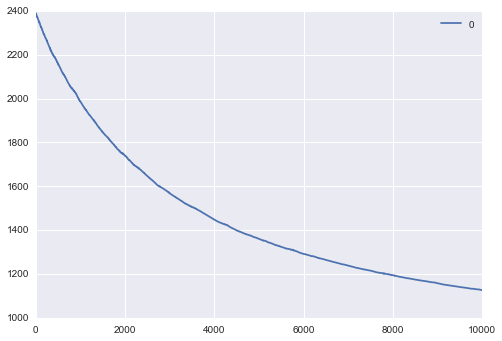

In [351]:
w4, risks4 = stochastic_wrapper(bin_X, y, num_iters, learning_rate)
risks4.plot()

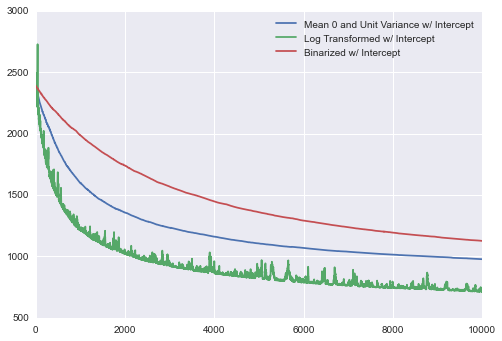

In [352]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()

The plots are different from before because they're a lot choppier. This makes sense as we're not always choosing the optimal gradient to go down.

## 3.3

In [355]:
learning_rate = None
num_iters = 1000

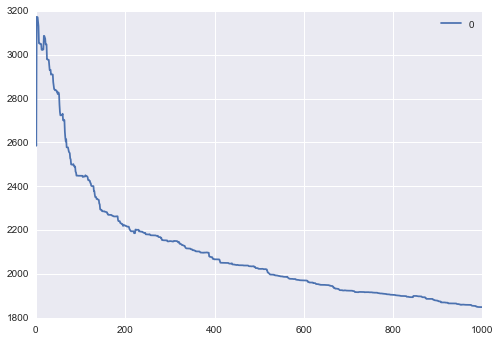

In [356]:
w2, risks2 = stochastic_wrapper(stan_X, y, num_iters, learning_rate)
risks2.plot()

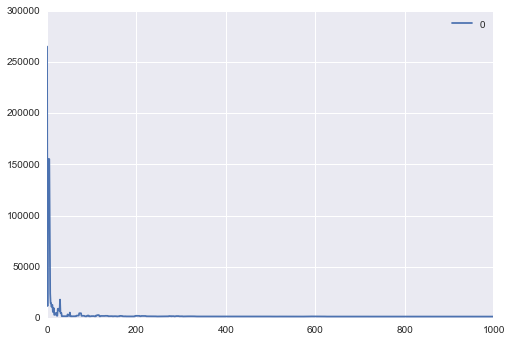

In [357]:
w3, risks3 = stochastic_wrapper(log_X, y, num_iters, learning_rate)
risks3.plot()

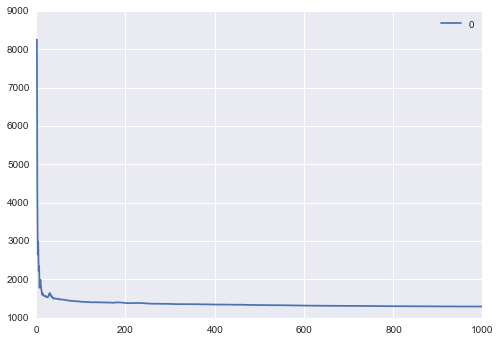

In [358]:
w4, risks4 = stochastic_wrapper(bin_X, y, num_iters, learning_rate)
risks4.plot()

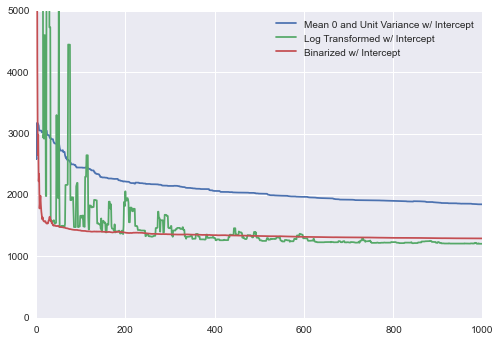

In [360]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot(ylim=(0, 5000))

The automatic iteration is much less stable, it also seems to get stuck in a local minimum. 

## 3.4.a

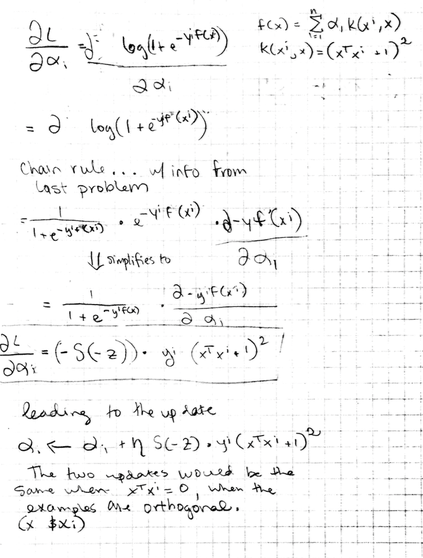

In [270]:
Image(filename='3.4.a.png')

## 3.4.b

In [255]:
def quadratic_kernel_ridge_sgd(xi, yi, alphai, X, alpha, gamma, lr):
    fx = np.dot(alpha, np.power((np.dot(xi, X.T) + 1), 2))
    z = yi * fx 
    if z >= 100:    # clamping as instructed by Brian Chu
        z = 99
    elif z <= -100:
        z = -99
    sz = 1 / (1 + np.exp(-z))
    new_alpha = alphai - ((gamma * alphai) + (lr * sz * yi))
    loss = np.log(1 + np.exp(z))
    return new_alpha, loss


def qkrsgd_test(vX, vy, tX, ty, alpha):
    val_risk = []
    for count, (xi, yi) in enumerate(zip(vX, vy)):
        fx = np.dot(alpha, np.power((np.dot(xi, tX.T) + 1), 2))
        z = yi * fx
        if z >= 100:     # clamping as instructed by Brian Chu
            z = 99
        elif z <= -100:
            z = -99
        loss = np.log(1 + np.exp(z))
        val_risk.append(loss)
    return np.sum(val_risk)

def qkrsgd_wrapper(X, y, gamma, num_iters, lr=None):
    split = int(len(X) * 2 / 3)
    tX, ty = X[:split], y[:split]
    vX, vy = X[split:], y[split:]
    print("Creating training and test sets of %i and %i" % (len(tX), len(vX)))
    alpha = np.random.randn(len(tX))
    print("Creating alphas of length: ", len(alpha))
    np.random.seed(25)
    iters = np.random.choice(split, num_iters)
    print("Creating iteration choices of length ", len(iters))
    nullLR = False
    if not lr:
        nullLR = True
        print("auto learning rate")
    else:
        print("Learning rate of ", lr)
    risks = []
    iteration_numbers = []
    val_risks = []
    epoch_risk = [] # epoch is defined as 100 examples
    for count, choice in enumerate(iters):
        if nullLR:
            lr = 1 / (count + 1)
        xi, yi, alphai = tX[choice], ty[choice], alpha[choice]
        new_alpha, loss = quadratic_kernel_ridge_sgd(xi, yi, alphai, tX, alpha, gamma, lr)
        alpha[choice] = new_alpha
        alpha[choice+1:] -= (alpha[choice+1:] * gamma)
        alpha[:choice] -= (alpha[:choice] * gamma)
        epoch_risk.append(loss)
        if count % 100 == 0:
            iteration_numbers.append(count)
            risks.append(np.sum(epoch_risk))
            epoch_risk = [] # resetting the epoch risk
            val_risks.append(qkrsgd_test(vX, vy, tX, ty, alpha))
    return alpha, pd.DataFrame({
            "iteration_number": iteration_numbers,
            "training_risk":risks,
            "validation_risk": val_risks
        })


def linear_kernel_ridge_sgd(xi, yi, alphai, X, alpha, gamma, lr):
    fx = np.dot(alpha, (np.dot(xi, X.T) + 1))
    z = yi * fx 
    if z >= 100:    # clamping as instructed by Brian Chu
        z = 99
    elif z <= -100:
        z = -99
    sz = 1 / (1 + np.exp(-z))
    new_alpha = alphai - ((gamma * alphai) + (lr * sz * yi))
    loss = np.log(1 + np.exp(z))
    return new_alpha, loss


def lkrsgd_test(vX, vy, tX, ty, alpha):
    val_risk = []
    for count, (xi, yi) in enumerate(zip(vX, vy)):
        fx = np.dot(alpha, (np.dot(xi, tX.T) + 1))
        z = yi * fx
        if z >= 100:     # clamping as instructed by Brian Chu
            z = 99
        elif z <= -100:
            z = -99
        loss = np.log(1 + np.exp(z))
        val_risk.append(loss)
    return np.sum(val_risk)

def lkrsgd_wrapper(X, y, gamma, num_iters, lr=None):
    split = int(len(X) * 2 / 3)
    tX, ty = X[:split], y[:split]
    vX, vy = X[split:], y[split:]
    print("Creating training and test sets of %i and %i" % (len(tX), len(vX)))
    alpha = np.random.randn(len(X))
    print("Creating alphas of length: ", len(alpha))
    np.random.seed(25)
    iters = np.random.choice(split, num_iters)
    print("Creating iteration choices of length ", len(iters))
    nullLR = False
    if not lr:
        nullLR = True
        print("auto learning rate")
    else:
        print("Learning rate of ", lr)
    risks = []
    iteration_numbers = []
    val_risks = []
    epoch_risk = [] # epoch is defined as 100 examples
    for count, choice in enumerate(iters):
        if nullLR:
            lr = 1 / (count + 1)
        xi, yi, alphai = tX[choice], ty[choice], alpha[choice]
        new_alpha, loss = linear_kernel_ridge_sgd(xi, yi, alphai, tX, alpha, gamma, lr)
        alpha[choice] = new_alpha
        alpha[choice+1:] -= (alpha[choice+1:] * gamma)
        alpha[:choice] -= (alpha[:choice] * gamma)
        epoch_risk.append(loss)
        if count % 100 == 0:
            iteration_numbers.append(count)
            risks.append(np.sum(epoch_risk))
            epoch_risk = [] # resetting the epoch risk
            val_risks.append(lkrsgd_test(vX, vy, tX, ty, alpha))
    return alpha, pd.DataFrame({
            "iteration_number": iteration_numbers,
            "training_risk":risks,
            "validation_risk": val_risks
        })

In [361]:
X.shape

(3450, 58)

In [391]:
xi = X[1]
xi.shape

(58,)

In [392]:
alpha = np.random.randn(len(X))
alpha.shape

(3450,)

In [393]:
np.power((np.dot(X,xi) + 1), 2)

array([  8.77105842e+07,   2.60148093e+06,   5.54096997e+06, ...,
         6.93954850e+07,   1.11261855e+08,   1.28308741e+09])

In [394]:
np.power((X.dot(X.T)[1156] + 1), 2)

array([  2168379.941764,     58008.7225  ,    122372.633124, ...,
         1747403.747236,   2646374.125824,  31297512.758724])

In [386]:
np.power((X.dot(X.T) + 1), 2)

array([[  3.39897340e+09,   8.77105842e+07,   1.83415656e+08, ...,
          2.74412227e+09,   4.12597145e+09,   4.89491178e+10],
       [  8.77105842e+07,   2.60148093e+06,   5.54096997e+06, ...,
          6.93954850e+07,   1.11261855e+08,   1.28308741e+09],
       [  1.83415656e+08,   5.54096997e+06,   1.22065317e+07, ...,
          1.44385361e+08,   2.35144962e+08,   2.69382190e+09],
       ..., 
       [  2.74412227e+09,   6.93954850e+07,   1.44385361e+08, ...,
          2.22339701e+09,   3.30793904e+09,   3.94276074e+10],
       [  4.12597145e+09,   1.11261855e+08,   2.35144962e+08, ...,
          3.30793904e+09,   5.09015751e+09,   5.97752619e+10],
       [  4.89491178e+10,   1.28308741e+09,   2.69382190e+09, ...,
          3.94276074e+10,   5.97752619e+10,   7.06797543e+11]])

In [364]:
np.power((np.dot(xi, X.T) + 1), 2).shape

(3450,)

In [275]:
n_iters = 10000

In [276]:
w, risks = qkrsgd_wrapper(log_X, y, 1, n_iters, 1)

Creating training and test sets of 2300 and 1150
Creating alphas of length:  2300
Creating iteration choices of length  10000
Learning rate of  1


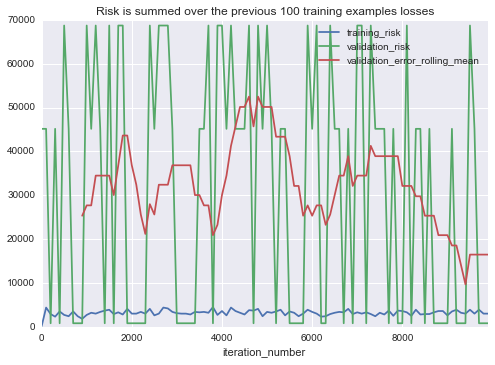

In [277]:
risks.set_index("iteration_number")
risks["validation_error_rolling_mean"] = pd.rolling_mean(risks.validation_risk, 10)
risks.plot(title='Risk is summed over the previous 100 training examples losses', x='iteration_number')

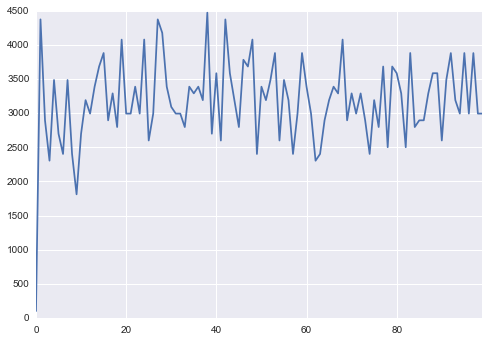

In [278]:
risks.training_risk.plot()

In [260]:
w, risks2 = lkrsgd_wrapper(log_X, y, 10e-5, n_iters, 1)

Creating training and test sets of 2300 and 1150
Creating alphas of length:  2300
Creating iteration choices of length  10000
Learning rate of  1


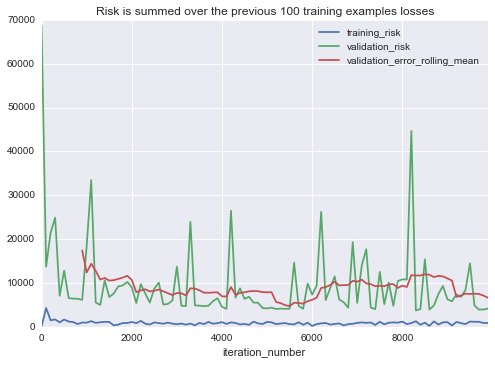

In [261]:
risks2.set_index("iteration_number")
risks2["validation_error_rolling_mean"] = pd.rolling_mean(risks2.validation_risk, 10)
risks2.plot(title='Risk is summed over the previous 100 training examples losses', x='iteration_number')

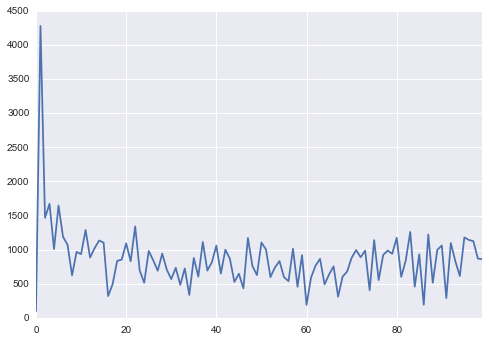

In [262]:
risks2.training_risk.plot()

# Problem 4